<a href="https://colab.research.google.com/github/kiyong21c/kaggle/blob/main/20220827_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분 분석(PCA, principal Component Analysis)
 - 비지도 학습
 - 예측 X, 분류 X
 - 변수의 개수를 줄이되 가능한 그 특성을 보존하는 기법
 - 기존 변수들의 정보를 모두 반영하는 새로운 변수들을 만드는 방식의 차원 축소
 - 장점 : 시각화에 유용, 변수간의 높은 상관관계 문제 해결
 - 단점 : 새로운 변수를 사용하므로 해석에 어려움, 차원축소에 따른 불가피한 정보손실

# 데이터의 차원을 축소하여 이해하기 쉽게 시각화
 - 알고리즘 : 주성분 분석(PCA)
 - 문제유형 : 비지도 학습
 - 평가지표 : 기존 분산 반영 비율
 - 사용모델 : KMeans

## 라이브러리 및 데이터 불러오기

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'http://raw.githubusercontent.com/musthave-ML10/data_source/main/customer_pca.csv'
customer = pd.read_csv(file_url)

In [64]:
customer.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,label
0,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930,0
1,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587,3
2,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891,1
3,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675,0
4,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796,3


 - 변수가 2개인 경우 x, y축에 지정하여 쉽게 그래프를 그릴수 있다
 - PCA를 사용하여 이 많은 변수들을 2개로 축소한 뒤 산점도 그래프로 클러스터 확인해 보자

In [65]:
# PCA 훈련시 종속변수(label)은 제외 시켜야 하므로
customer_X = customer.drop('label', axis=1) # 독립변수 지정
customer_y = customer['label'] # 종속변수 지정

### 그래프 표현을 위한 차원 축소

In [66]:
from sklearn.decomposition import PCA

In [67]:
pca = PCA(n_components=2) # 2차원 평면에 그래프를 그리는 것이 목적

In [68]:
customer_pca = pca.fit_transform(customer_X) # 학습

In [69]:
customer_pca

array([[-3.92906072e+00,  1.02604491e-01],
       [ 3.10758276e+00, -1.74887930e+00],
       [ 3.02379272e+00,  3.21221215e+00],
       [-4.28241767e+00,  1.13781030e-02],
       [ 2.59065802e+00, -1.90612064e+00],
       [ 8.70343520e-01, -1.79154348e-02],
       [-1.16508938e+00,  2.00387900e+00],
       [ 1.41163657e+00, -1.21220170e+00],
       [ 1.79302072e-01, -1.15337545e+00],
       [-2.74166293e+00, -3.48112299e-02],
       [ 4.03108363e-01, -2.56426911e-01],
       [-4.32816586e+00,  1.09280479e-01],
       [-1.06779010e+00, -4.71336448e-01],
       [-3.54208654e+00,  2.09373453e-01],
       [ 3.00321739e+00,  6.85140300e-02],
       [ 5.08464052e+00, -1.92234923e+00],
       [-1.39044460e+00,  3.22162225e-01],
       [-2.64318989e+00, -4.59744830e-01],
       [-7.37714393e-01, -9.30393910e-01],
       [-3.93420145e+00,  1.62749639e-01],
       [ 3.16675507e-01, -4.22288613e-01],
       [ 7.31864853e+00,  5.17885391e-02],
       [ 6.60448573e-01, -1.13828656e+00],
       [-3.

In [70]:
customer_pca = pd.DataFrame(customer_pca, columns=['PC1','PC2'])

In [72]:
coustomer_pca = customer_pca.join(customer_y)

In [73]:
coustomer_pca.head()

,PC1,PC2,label
0,-3.929061,0.102604,0
1,3.107583,-1.748879,3
2,3.023793,3.212212,1
3,-4.282418,0.011378,0
4,2.590658,-1.906121,3


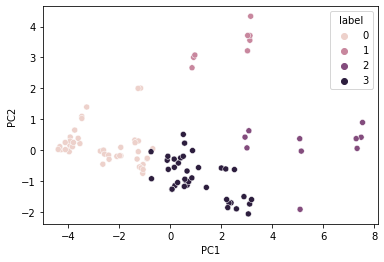

In [74]:
sns.scatterplot(x='PC1', y='PC2', data=coustomer_pca, hue='label')

 - PCA를 통해 얻어낸 변수 PC1과 PC2는 기존의 모든 변수를 복합적으로 반영하여 만들어짐
 - 명료하게 이 새로운 변수들을 해석하기 쉽지 않음

 - 학습에 사용한 모델 pca 뒤에 components_를 붙여 각 주성분과 기존 변수와의 상관관계 확인 가능

In [75]:
pca.components_

array([[ 0.3484681 ,  0.32447242,  0.30303652,  0.14186907,  0.30618347,
         0.31297263,  0.29718852,  0.3045823 ,  0.29341337,  0.30287672,
         0.32053447,  0.08927503],
       [ 0.05827591,  0.06034266,  0.15264674, -0.54435586,  0.03109502,
         0.03790586,  0.23809571, -0.2315275 , -0.2471928 , -0.20898284,
         0.14479001,  0.65946781]])

In [77]:
df_comp = pd.DataFrame(pca.components_, columns=customer_X.columns)
df_comp

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,0.348468,0.324472,0.303037,0.141869,0.306183,0.312973,0.297189,0.304582,0.293413,0.302877,0.320534,0.089275
1,0.058276,0.060343,0.152647,-0.544356,0.031095,0.037906,0.238096,-0.231528,-0.247193,-0.208983,0.144790,0.659468


 - 인덱스 0과 1은 각각 주성분 PC1과 PC2를 의미

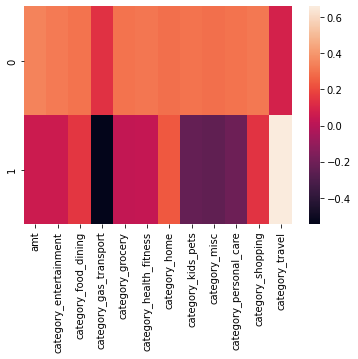

In [81]:
# sns.heatmap(pca.components_) # 가능하지만 변수명이 없어 해석에 어려움
sns.heatmap(df_comp) # 데이터프레임을 활용하므로 변수명까지 포함시킬 수 있음

# 데이터의 차원을 축소해 학습 시간을 줄이고 성능을 향상시키자
 - 알고리즘 : 주성분 분석(PCA)
 - 문제유형 : 비지도 학습
 - 평가지표 : AUC
 - 사용모델 : PCA

### 다차원 데이터 불러오기


In [83]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/anonymous.csv'
anonymous = pd.read_csv(file_url)

In [88]:
anonymous.shape # 독립변수 4296개, 20000개의 데이터

(20000, 4297)

In [90]:
anonymous.columns[0] # 종속변수명

'class'

 - 결측치 확인

In [91]:
# anonymous.isna() # 결측치 → True
# anonymous.isna().sum() # 변수별 (True의)합계 → Series
anonymous.isna().sum().sum() # Series 값의 합계(즉, DataFrame의 결측치 전체합계)

0

### PCA에 따른 모델링 성능/결과 비교하기


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(anonymous.drop('class', axis=1), anonymous['class'],
                                                    test_size=0.2, random_state=100) # stratify=anonymous['class'] : class의 비율을 train, test에 동일하게 나눠줌
                                                    

 - PCA에서도 변수 간의 스케일을 일정하게 맞춰주는 것이 중요 → StandardScaler()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler